In [74]:
import sys
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

plt.rcParams.update({'font.family':'arial'})

%matplotlib inline

# Functions to parse and filter allele frequencies

In [75]:
def merge_timepoints_A115(csv24h,csv12h,csv8h,csv4h,csv2h,csv1h,csv0h,output_csv):
    '''
    Function to merge the time points for a base editor time point experiment with allele outputs
    '''
    
    # opening the allele frequency files for each time point
    df_24 = pd.read_csv(csv24h)
    df_12 = pd.read_csv(csv12h)
    df_8 = pd.read_csv(csv8h)
    df_4 = pd.read_csv(csv4h)
    df_2 = pd.read_csv(csv2h)
    df_1 = pd.read_csv(csv1h)
    df_0 = pd.read_csv(csv0h)
    
    # filtering df_24 for alleles with >0.1% frequency
    df_24 = df_24[df_24['mean'] > 0.1]
    
    # merging the 12hr onto 24hr, keeping all alleles from the 24hr
    df_merge1 = pd.merge(left=df_24, right=df_12, how='left', left_on='target', right_on='target')
    df_merge1.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM']
    
    # merging the 8hr onto the previous merge
    df_merge2 = pd.merge(left=df_merge1, right=df_8, how='left', left_on='target', right_on='target')
    df_merge2.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM']
    
    # merging the 4hr onto the previous merge
    df_merge3 = pd.merge(left=df_merge2, right=df_4, how='left', left_on='target', right_on='target')
    df_merge3.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM']
    
    # merging the 2hr onto the previous merge
    df_merge4 = pd.merge(left=df_merge3, right=df_2, how='left', left_on='target', right_on='target')
    df_merge4.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM']
    
    # merging the 1hr onto the previous merge
    df_merge5 = pd.merge(left=df_merge4, right=df_1, how='left', left_on='target', right_on='target')
    df_merge5.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM',
                         '1h_rep1','1h_rep2','1h_rep3','1h_mean','1h_SEM']
    
    # merging the 0 hr onto the previous merge
    df_merge6 = pd.merge(left=df_merge5, right=df_0, how='left', left_on='target', right_on='target')
    df_merge6.columns = ['target','24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM',
                         '1h_rep1','1h_rep2','1h_rep3','1h_mean','1h_SEM',
                         '0h_rep1','0h_rep2','0h_rep3','0h_mean','0h_SEM']
    
    # exporting to new csv
    df_merge6.to_csv(output_csv,index=False)
    
    return(df_24)

In [76]:
def merge_timepoints_DMSO(df_A115,csv24h,csv12h,csv8h,csv4h,csv2h,csv1h,csv0h,output_csv):
    '''
    Function to merge the time points for a base editor time point experiment with allele outputs
    '''
    
    # opening the allele frequency files for each time point
    df_24 = pd.read_csv(csv24h)
    df_12 = pd.read_csv(csv12h)
    df_8 = pd.read_csv(csv8h)
    df_4 = pd.read_csv(csv4h)
    df_2 = pd.read_csv(csv2h)
    df_1 = pd.read_csv(csv1h)
    df_0 = pd.read_csv(csv0h)
    
    # merging the 24hr onto the 24hr A115 alleles
    df_merge = pd.merge(left=df_A115, right=df_24, how='left', left_on='target', right_on='target')
    df_merge.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                        '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM']
    
    # merging the 12hr onto 24hr, keeping all alleles from the 24hr
    df_merge1 = pd.merge(left=df_merge, right=df_12, how='left', left_on='target', right_on='target')
    df_merge1.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM']
    
    # merging the 8hr onto the previous merge
    df_merge2 = pd.merge(left=df_merge1, right=df_8, how='left', left_on='target', right_on='target')
    df_merge2.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM']
    
    # merging the 4hr onto the previous merge
    df_merge3 = pd.merge(left=df_merge2, right=df_4, how='left', left_on='target', right_on='target')
    df_merge3.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM']
    
    # merging the 2hr onto the previous merge
    df_merge4 = pd.merge(left=df_merge3, right=df_2, how='left', left_on='target', right_on='target')
    df_merge4.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM']
    
    # merging the 1hr onto the previous merge
    df_merge5 = pd.merge(left=df_merge4, right=df_1, how='left', left_on='target', right_on='target')
    df_merge5.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM',
                         '1h_rep1','1h_rep2','1h_rep3','1h_mean','1h_SEM']
    
    # merging the 0 hr onto the previous merge
    df_merge6 = pd.merge(left=df_merge5, right=df_0, how='left', left_on='target', right_on='target')
    df_merge6.columns = ['target','A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM',
                         '24h_rep1','24h_rep2','24h_rep3','24h_mean','24h_SEM',
                         '12h_rep1','12h_rep2','12h_rep3','12h_mean','12h_SEM',
                         '8h_rep1','8h_rep2','8h_rep3','8h_mean','8h_SEM',
                         '4h_rep1','4h_rep2','4h_rep3','4h_mean','4h_SEM',
                         '2h_rep1','2h_rep2','2h_rep3','2h_mean','2h_SEM',
                         '1h_rep1','1h_rep2','1h_rep3','1h_mean','1h_SEM',
                         '0h_rep1','0h_rep2','0h_rep3','0h_mean','0h_SEM']
    
    df_final = df_merge6.drop(columns=['A115_rep1','A115_rep2','A115_rep3','A115_mean','A115_SEM'])
    
    # exporting to new csv
    df_final.to_csv(output_csv,index=False)

In [77]:
def plot_CBE_timecourse(csv_A115,csv_DMSO,target_seq):
    '''
    Function to parse .csv files with A115 and DMSO allele frequencies for plotting
    '''
    # reading A115 data
    df_A115 = pd.read_csv(csv_A115,
                          usecols=['target','24h_mean','24h_SEM','12h_mean','12h_SEM',
                                   '8h_mean','8h_SEM','4h_mean','4h_SEM',
                                   '2h_mean','2h_SEM','1h_mean','1h_SEM',
                                   '0h_mean','0h_SEM'])
    # filling all NaN with 0
    df_A115 = df_A115.fillna(0)
    
    # making an A115 dataframe with just the mean values for filtering
    df_A115_2 = pd.read_csv(csv_A115,
                            usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                                     '2h_mean','1h_mean','0h_mean'])
    # filling all NaN with 0
    df_A115_2 = df_A115_2.fillna(0)
    
    # getting a list of target sites where editing >0.3% at least one time point
    df_filter_list = list(df_A115_2['target'][df_A115_2.max(axis = 1) > 0.3])
    # filtering df_A115 for those in the filter list (>0.3% at any time point)
    df_A115 = df_A115[df_A115.target.isin(df_filter_list)].reset_index(drop=True)
    
    # reading DMSO data
    df_DMSO = pd.read_csv(csv_DMSO,
                          usecols=['target','24h_mean','24h_SEM','12h_mean','12h_SEM',
                                   '8h_mean','8h_SEM','4h_mean','4h_SEM',
                                   '2h_mean','2h_SEM','1h_mean','1h_SEM',
                                   '0h_mean','0h_SEM'])
    # filling all NaN with 0
    df_DMSO = df_DMSO.fillna(0)
    # filtering df_DMSO for those in the filter list
    df_DMSO = df_DMSO[df_DMSO.target.isin(df_filter_list)].reset_index(drop=True)
    
    # filtering for targets that only have edits at the adenines
    unedited_seq = target_seq
    unedited = list(unedited_seq)
    correct_edited_target = []
    # for loop to take out the non-A>G edits
    for row,target in enumerate(df_A115['target']):
        wrong_mut = 0
        for i,n in enumerate(target):
            if (unedited[i]=='A' and n!='A') or (unedited[i]=='G' and n!='G') or (unedited[i]=='T' and n!='T'):
                wrong_mut += 1
        if wrong_mut == 0:
            correct_edited_target.append(target) 
    # filtering dataframes for edited targets only at the A's
    df_A115 = df_A115[df_A115.target.isin(correct_edited_target)].reset_index(drop=True)
    df_DMSO = df_DMSO[df_DMSO.target.isin(correct_edited_target)].reset_index(drop=True)
    
    # sorting the dataframe by frequency at 24hr
    df_A115 = df_A115.sort_values(by=['24h_mean'],ascending=False).reset_index(drop=True)
    # list to sort all the DMSO dataframe
    df_order = list(df_A115['target'])
    
    # sorting DMSO data to order
    df_DMSO['cat'] = pd.Categorical(df_DMSO['target'],categories = df_order,ordered=True)
    df_DMSO = df_DMSO.sort_values(by='cat').reset_index(drop=True)
    
    # making an A115 dataframe with just the mean values
    df_A115_data = df_A115[['24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean']].copy()
    df_A115_data = df_A115_data[df_A115_data.columns[::-1]]
    
    # making a DMSO dataframe with just the mean values
    df_DMSO_data = df_DMSO[['24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean']].copy()
    df_DMSO_data = df_DMSO_data[df_DMSO_data.columns[::-1]]
    
    
    # making an A115 dataframe with just the SEM values
    df_A115_SEM = df_A115[['24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                           '2h_SEM','1h_SEM','0h_SEM']].copy()
    df_A115_SEM = df_A115_SEM[df_A115_SEM.columns[::-1]]

    # making a DMSO dataframe with just the mean values
    df_DMSO_SEM = df_DMSO[['24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                           '2h_SEM','1h_SEM','0h_SEM']].copy()
    df_DMSO_SEM = df_DMSO_SEM[df_DMSO_SEM.columns[::-1]]
    
    return(df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM)

In [78]:
def plot_ABE_timecourse(csv_A115,csv_DMSO,target_seq):
    '''
    Function to parse .csv files with A115 and DMSO allele frequencies for plotting
    '''
    # reading A115 data
    df_A115 = pd.read_csv(csv_A115,
                          usecols=['target','24h_mean','24h_SEM','12h_mean','12h_SEM',
                                   '8h_mean','8h_SEM','4h_mean','4h_SEM',
                                   '2h_mean','2h_SEM','1h_mean','1h_SEM',
                                   '0h_mean','0h_SEM'])
    # filling all NaN with 0
    df_A115 = df_A115.fillna(0)
    
    # making an A115 dataframe with just the mean values for filtering
    df_A115_2 = pd.read_csv(csv_A115,
                            usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                                     '2h_mean','1h_mean','0h_mean'])
    # filling all NaN with 0
    df_A115_2 = df_A115_2.fillna(0)
    
    # getting a list of target sites where editing >0.3% at least one time point
    df_filter_list = list(df_A115_2['target'][df_A115_2.max(axis = 1) > 0.3])
    # filtering df_A115 for those in the filter list (>0.3% at any time point)
    df_A115 = df_A115[df_A115.target.isin(df_filter_list)].reset_index(drop=True)
    
    # reading DMSO data
    df_DMSO = pd.read_csv(csv_DMSO,
                          usecols=['target','24h_mean','24h_SEM','12h_mean','12h_SEM',
                                   '8h_mean','8h_SEM','4h_mean','4h_SEM',
                                   '2h_mean','2h_SEM','1h_mean','1h_SEM',
                                   '0h_mean','0h_SEM'])
    # filling all NaN with 0
    df_DMSO = df_DMSO.fillna(0)
    # filtering df_DMSO for those in the filter list
    df_DMSO = df_DMSO[df_DMSO.target.isin(df_filter_list)].reset_index(drop=True)
    
    # filtering for targets that only have edits at the adenines
    unedited_seq = target_seq
    unedited = list(unedited_seq)
    correct_edited_target = []
    # for loop to take out the non-A>G edits
    for row,target in enumerate(df_A115['target']):
        wrong_mut = 0
        for i,n in enumerate(target):
            if (unedited[i]=='C' and n!='C') or (unedited[i]=='G' and n!='G') or (unedited[i]=='T' and n!='T'):
                wrong_mut += 1
        if wrong_mut == 0:
            correct_edited_target.append(target) 
    # filtering dataframes for edited targets only at the A's
    df_A115 = df_A115[df_A115.target.isin(correct_edited_target)].reset_index(drop=True)
    df_DMSO = df_DMSO[df_DMSO.target.isin(correct_edited_target)].reset_index(drop=True)
    
    # sorting the dataframe by frequency at 24hr
    df_A115 = df_A115.sort_values(by=['24h_mean'],ascending=False).reset_index(drop=True)
    # list to sort all the DMSO dataframe
    df_order = list(df_A115['target'])
    
    # sorting DMSO data to order
    df_DMSO['cat'] = pd.Categorical(df_DMSO['target'],categories = df_order,ordered=True)
    df_DMSO = df_DMSO.sort_values(by='cat').reset_index(drop=True)
    
    # making an A115 dataframe with just the mean values
    df_A115_data = df_A115[['24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean']].copy()
    df_A115_data = df_A115_data[df_A115_data.columns[::-1]]
    
    # making a DMSO dataframe with just the mean values
    df_DMSO_data = df_DMSO[['24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean']].copy()
    df_DMSO_data = df_DMSO_data[df_DMSO_data.columns[::-1]]
    
    
    # making an A115 dataframe with just the SEM values
    df_A115_SEM = df_A115[['24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                           '2h_SEM','1h_SEM','0h_SEM']].copy()
    df_A115_SEM = df_A115_SEM[df_A115_SEM.columns[::-1]]

    # making a DMSO dataframe with just the mean values
    df_DMSO_SEM = df_DMSO[['24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                           '2h_SEM','1h_SEM','0h_SEM']].copy()
    df_DMSO_SEM = df_DMSO_SEM[df_DMSO_SEM.columns[::-1]]
    
    return(df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM)

# 5A) BE4max, HEK3 allele frequency time course

In [79]:
# BE4max, HEK3
df_A115 = merge_timepoints_A115('Data/BE4max_HEK3/24hr_BE4_F22_HEK3_A115_allelefreq.csv',
                                'Data/BE4max_HEK3/12hr_BE4_F22_HEK3_A115_allelefreq.csv',
                                'Data/BE4max_HEK3/8hr_BE4_F22_HEK3_A115_allelefreq.csv',
                                'Data/BE4max_HEK3/4hr_BE4_F22_HEK3_A115_allelefreq.csv',
                                'Data/BE4max_HEK3/2hr_BE4_F22_HEK3_A115_allelefreq.csv',
                                'Data/BE4max_HEK3/1hr_BE4_F22_HEK3_A115_allelefreq.csv',
                                'Data/BE4max_HEK3/0hr_BE4_F22_HEK3_allelefreq.csv',
                                'Data/merged/20211109_BE4max_HEK3_A115.csv')

merge_timepoints_DMSO(df_A115,
                     'Data/BE4max_HEK3/24hr_BE4_F22_HEK3_DMSO_allelefreq.csv',
                     'Data/BE4max_HEK3/12hr_BE4_F22_HEK3_DMSO_allelefreq.csv',
                     'Data/BE4max_HEK3/8hr_BE4_F22_HEK3_DMSO_allelefreq.csv',
                     'Data/BE4max_HEK3/4hr_BE4_F22_HEK3_DMSO_allelefreq.csv',
                     'Data/BE4max_HEK3/2hr_BE4_F22_HEK3_DMSO_allelefreq.csv',
                     'Data/BE4max_HEK3/1hr_BE4_F22_HEK3_DMSO_allelefreq.csv',
                     'Data/BE4max_HEK3/0hr_BE4_F22_HEK3_allelefreq.csv',
                     'Data/merged/20211109_BE4max_HEK3_DMSO.csv')

In [80]:
df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM = plot_CBE_timecourse('Data/merged/20211109_BE4max_HEK3_A115.csv',
                                                                                        'Data/merged/20211109_BE4max_HEK3_DMSO.csv',
                                                                                        'GGCCCAGACTGAGCACGTGA')

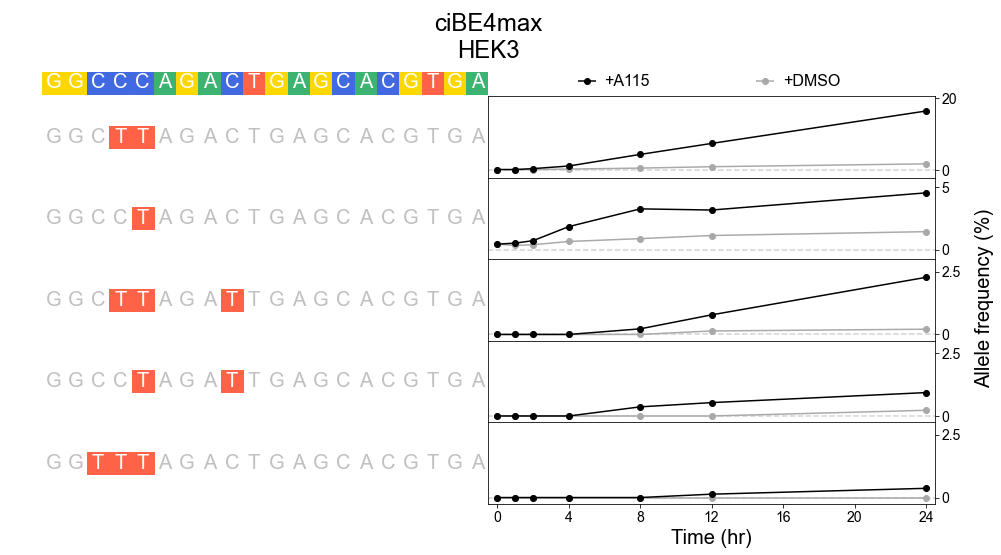

In [81]:
ref = 'GGCCCAGACTGAGCACGTGA'
plt.rc('font', size=20)

fig, ax = plt.subplots(len(df_A115_data),2,figsize=(16,len(df_A115)*1.5),gridspec_kw={'width_ratios': [1,1]})

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

timepoints = [0,1,2,4,8,12,24]

target_row = 0

for i, ax in enumerate(fig.axes):
    if i%2 == 0:
        ax.set_xlim([0,20])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if df_A115.iloc[target_row]['target'] == ref:
            ax.set_ylim([0.45,0.75])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == 'A':
                    ax.scatter(x+0.5,0.5,s=450,c='mediumseagreen',marker='s')
                    ax.text(x+0.5,0.5, 'A', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'C':
                    ax.scatter(x+0.5,0.5,s=450,c='royalblue',marker='s')
                    ax.text(x+0.5,0.5, 'C', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'G':
                    ax.scatter(x+0.5,0.5,s=450,c='gold',marker='s')
                    ax.text(x+0.5,0.5, 'G', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'T':
                    ax.scatter(x+0.5,0.5,s=450,c='tomato',marker='s')
                    ax.text(x+0.5,0.5, 'T', ha='center',va='center',color='white',size=20)
        else:
            ax.set_ylim([0.95,1.05])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == ref[x]:
                    ax.text(x+0.5,1, nucleotide, ha='center',va='center',color='silver',size=20)
                else:
                    if nucleotide == 'A':
                        ax.scatter(x+0.5,1,s=450,c='mediumseagreen',marker='s')
                        ax.text(x+0.5,1, 'A', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'C':
                        ax.scatter(x+0.5,1,s=450,c='royalblue',marker='s')
                        ax.text(x+0.5,1, 'C', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'G':
                        ax.scatter(x+0.5,1,s=450,c='gold',marker='s')
                        ax.text(x+0.5,1, 'G', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'T':
                        ax.scatter(x+0.5,1,s=450,c='tomato',marker='s')
                        ax.text(x+0.5,1, 'T', ha='center',va='center',color='white',size=20)
        target_row+=1
    else:
        if i != len(df_A115_data)*2-1:
            ax.get_xaxis().set_visible(False)
        if i == 1:
            ax.get_yaxis().set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.yaxis.tick_right()
        ax.set_xlim([-0.5,24.5])
        
fig.axes[3].errorbar(timepoints,df_DMSO_data.iloc[1],yerr=df_DMSO_SEM.iloc[1],fmt='-o',color='darkgrey')
fig.axes[3].errorbar(timepoints,df_A115_data.iloc[1],yerr=df_A115_SEM.iloc[1],fmt='-o',color='black')
fig.axes[3].set_ylim([-2,20.5])
fig.axes[3].set_yticks([0,20])
fig.axes[3].set_yticklabels([0,20],fontsize=14)
fig.axes[3].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[5].errorbar(timepoints,df_DMSO_data.iloc[2],yerr=df_DMSO_SEM.iloc[2],fmt='-o',color='darkgrey')
fig.axes[5].errorbar(timepoints,df_A115_data.iloc[2],yerr=df_A115_SEM.iloc[2],fmt='-o',color='black')
fig.axes[5].set_ylim([-0.75,5.75])
fig.axes[5].set_yticks([0,5])
fig.axes[5].set_yticklabels([0,5],fontsize=14)
fig.axes[5].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[7].errorbar(timepoints,df_DMSO_data.iloc[3],yerr=df_DMSO_SEM.iloc[3],fmt='-o',color='darkgrey')
fig.axes[7].errorbar(timepoints,df_A115_data.iloc[3],yerr=df_A115_SEM.iloc[3],fmt='-o',color='black')
fig.axes[7].set_ylim([-0.25,3])
fig.axes[7].set_yticks([0,2.5])
fig.axes[7].set_yticklabels([0,2.5],fontsize=14)
fig.axes[7].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[9].errorbar(timepoints,df_DMSO_data.iloc[4],yerr=df_DMSO_SEM.iloc[4],fmt='-o',color='darkgrey')
fig.axes[9].errorbar(timepoints,df_A115_data.iloc[4],yerr=df_A115_SEM.iloc[4],fmt='-o',color='black')
fig.axes[9].set_ylim([-0.25,3])
fig.axes[9].set_yticks([0,2.5])
fig.axes[9].set_yticklabels([0,2.5],fontsize=14)
fig.axes[9].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[11].errorbar(timepoints,df_DMSO_data.iloc[5],yerr=df_DMSO_SEM.iloc[5],fmt='-o',color='darkgrey')
fig.axes[11].errorbar(timepoints,df_A115_data.iloc[5],yerr=df_A115_SEM.iloc[5],fmt='-o',color='black')
fig.axes[11].set_ylim([-0.25,3])
fig.axes[11].set_yticks([0,2.5])
fig.axes[11].set_yticklabels([0,2.5],fontsize=14)
fig.axes[11].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[11].set_xlabel('Time (hr)',fontsize=20)
fig.axes[11].set_xticklabels(timepoints,fontsize=14)
fig.axes[11].set_xticks([0,4,8,12,16,20,24])
fig.axes[11].set_xticklabels([0,4,8,12,16,20,24],fontsize=14)

fig.add_subplot(1,1,1, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.axes[12].yaxis.set_label_position('right')
fig.axes[12].set_ylabel('Allele frequency (%)',labelpad=40,position=(2,0.42),fontsize=20)

fig.axes[1].errorbar(5,0.5,xerr=0.5,fmt='o',color='black')
fig.axes[1].text(6,0.5,'+A115', ha='left',va='center',color='black',size=16)
fig.axes[1].errorbar(15,0.5,xerr=0.5,fmt='o',color='darkgrey')
fig.axes[1].text(16,0.5,'+DMSO', ha='left',va='center',color='black',size=16)
fig.axes[1].set_ylim([0,2.75])

plt.title('ciBE4max\nHEK3',y=0.9)

plt.savefig('ExportedPlots/BE4max_HEK3_allelefreq_timecourse_20211109.svg',dpi=300,bbox_inches='tight')

# 5B) ABEmax, ABE16 allele frequency time course

In [82]:
# ABEmax, ABE16
df_A115 = merge_timepoints_A115('Data/ABEmax_ABE16/24hr_ABE_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABEmax_ABE16/12hr_ABE_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABEmax_ABE16/8hr_ABE_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABEmax_ABE16/4hr_ABE_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABEmax_ABE16/2hr_ABE_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABEmax_ABE16/1hr_ABE_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABEmax_ABE16/0hr_ABE_F22_ABE16_allelefreq.csv',
                                'Data/merged/20211109_ABEmax_ABE16_A115.csv')

merge_timepoints_DMSO(df_A115,
                     'Data/ABEmax_ABE16/24hr_ABE_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABEmax_ABE16/12hr_ABE_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABEmax_ABE16/8hr_ABE_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABEmax_ABE16/4hr_ABE_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABEmax_ABE16/2hr_ABE_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABEmax_ABE16/1hr_ABE_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABEmax_ABE16/0hr_ABE_F22_ABE16_allelefreq.csv',
                     'Data/merged/20211109_ABEmax_ABE16_DMSO.csv')

In [83]:
df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM = plot_ABE_timecourse('Data/merged/20211109_ABEmax_ABE16_A115.csv',
                                                                                        'Data/merged/20211109_ABEmax_ABE16_DMSO.csv',
                                                                                        'GGGAATAAATCATAGAATCC')

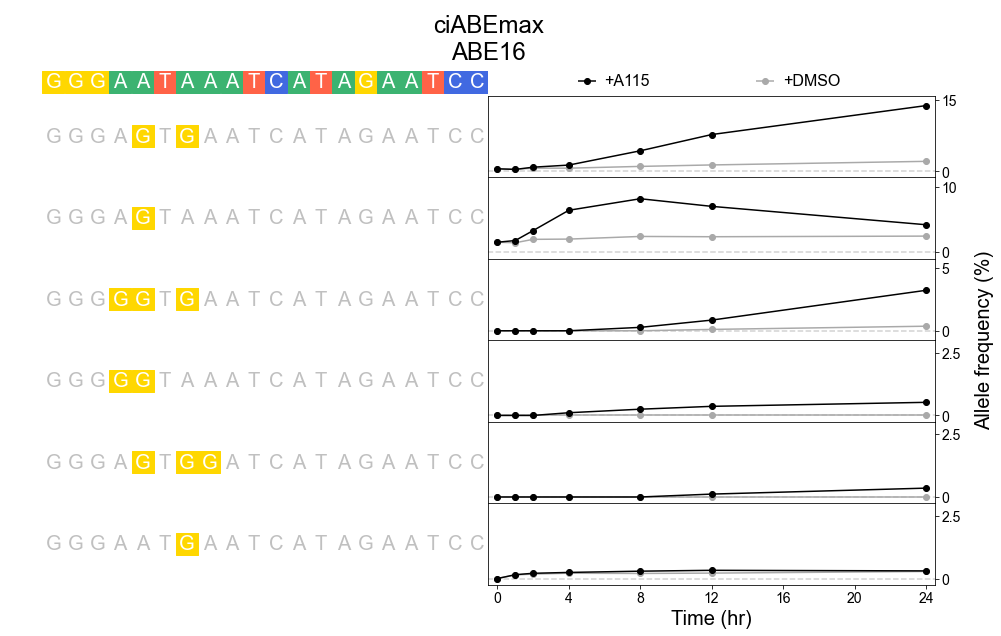

In [84]:
ref = 'GGGAATAAATCATAGAATCC'
plt.rc('font', size=20)

fig, ax = plt.subplots(len(df_A115_data),2,figsize=(16,len(df_A115_data)*1.5),gridspec_kw={'width_ratios': [1,1]})

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

timepoints = [0,1,2,4,8,12,24]

target_row = 0

for i, ax in enumerate(fig.axes):
    if i%2 == 0:
        ax.set_xlim([0,20])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if df_A115.iloc[target_row]['target'] == ref:
            ax.set_ylim([0.45,0.75])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == 'A':
                    ax.scatter(x+0.5,0.5,s=450,c='mediumseagreen',marker='s')
                    ax.text(x+0.5,0.5, 'A', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'C':
                    ax.scatter(x+0.5,0.5,s=450,c='royalblue',marker='s')
                    ax.text(x+0.5,0.5, 'C', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'G':
                    ax.scatter(x+0.5,0.5,s=450,c='gold',marker='s')
                    ax.text(x+0.5,0.5, 'G', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'T':
                    ax.scatter(x+0.5,0.5,s=450,c='tomato',marker='s')
                    ax.text(x+0.5,0.5, 'T', ha='center',va='center',color='white',size=20)
        else:
            ax.set_ylim([0.95,1.05])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == ref[x]:
                    ax.text(x+0.5,1, nucleotide, ha='center',va='center',color='silver',size=20)
                else:
                    if nucleotide == 'A':
                        ax.scatter(x+0.5,1,s=450,c='mediumseagreen',marker='s')
                        ax.text(x+0.5,1, 'A', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'C':
                        ax.scatter(x+0.5,1,s=450,c='royalblue',marker='s')
                        ax.text(x+0.5,1, 'C', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'G':
                        ax.scatter(x+0.5,1,s=450,c='gold',marker='s')
                        ax.text(x+0.5,1, 'G', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'T':
                        ax.scatter(x+0.5,1,s=450,c='tomato',marker='s')
                        ax.text(x+0.5,1, 'T', ha='center',va='center',color='white',size=20)
        target_row+=1
    else:
        if i != len(df_A115_data)*2-1:
            ax.get_xaxis().set_visible(False)
        if i == 1:
            ax.get_yaxis().set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.yaxis.tick_right()
        ax.set_xlim([-0.5,24.5])
        
fig.axes[3].errorbar(timepoints,df_DMSO_data.iloc[1],yerr=df_DMSO_SEM.iloc[1],fmt='-o',color='darkgrey')
fig.axes[3].errorbar(timepoints,df_A115_data.iloc[1],yerr=df_A115_SEM.iloc[1],fmt='-o',color='black')
fig.axes[3].set_ylim([-1.2,16])
fig.axes[3].set_yticks([0,15])
fig.axes[3].set_yticklabels([0,15],fontsize=14)
fig.axes[3].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[5].errorbar(timepoints,df_DMSO_data.iloc[2],yerr=df_DMSO_SEM.iloc[2],fmt='-o',color='darkgrey')
fig.axes[5].errorbar(timepoints,df_A115_data.iloc[2],yerr=df_A115_SEM.iloc[2],fmt='-o',color='black')
fig.axes[5].set_ylim([-1,11.5])
fig.axes[5].set_yticks([0,10])
fig.axes[5].set_yticklabels([0,10],fontsize=14)
fig.axes[5].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[7].errorbar(timepoints,df_DMSO_data.iloc[3],yerr=df_DMSO_SEM.iloc[3],fmt='-o',color='darkgrey')
fig.axes[7].errorbar(timepoints,df_A115_data.iloc[3],yerr=df_A115_SEM.iloc[3],fmt='-o',color='black')
fig.axes[7].set_ylim([-0.75,5.75])
fig.axes[7].set_yticks([0,5])
fig.axes[7].set_yticklabels([0,5],fontsize=14)
fig.axes[7].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[9].errorbar(timepoints,df_DMSO_data.iloc[4],yerr=df_DMSO_SEM.iloc[4],fmt='-o',color='darkgrey')
fig.axes[9].errorbar(timepoints,df_A115_data.iloc[4],yerr=df_A115_SEM.iloc[4],fmt='-o',color='black')
fig.axes[9].set_ylim([-0.25,3])
fig.axes[9].set_yticks([0,2.5])
fig.axes[9].set_yticklabels([0,2.5],fontsize=14)
fig.axes[9].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[11].errorbar(timepoints,df_DMSO_data.iloc[5],yerr=df_DMSO_SEM.iloc[5],fmt='-o',color='darkgrey')
fig.axes[11].errorbar(timepoints,df_A115_data.iloc[5],yerr=df_A115_SEM.iloc[5],fmt='-o',color='black')
fig.axes[11].set_ylim([-0.25,3])
fig.axes[11].set_yticks([0,2.5])
fig.axes[11].set_yticklabels([0,2.5],fontsize=14)
fig.axes[11].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[13].errorbar(timepoints,df_DMSO_data.iloc[6],yerr=df_DMSO_SEM.iloc[6],fmt='-o',color='darkgrey')
fig.axes[13].errorbar(timepoints,df_A115_data.iloc[6],yerr=df_A115_SEM.iloc[6],fmt='-o',color='black')
fig.axes[13].set_ylim([-0.25,3])
fig.axes[13].set_yticks([0,2.5])
fig.axes[13].set_yticklabels([0,2.5],fontsize=14)
fig.axes[13].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[13].set_xlabel('Time (hr)',fontsize=20)
fig.axes[13].set_xticklabels(timepoints,fontsize=14)
fig.axes[13].set_xticks([0,4,8,12,16,20,24])
fig.axes[13].set_xticklabels([0,4,8,12,16,20,24],fontsize=14)

fig.add_subplot(1,1,1, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.axes[14].yaxis.set_label_position('right')
fig.axes[14].set_ylabel('Allele frequency (%)',labelpad=40,position=(2,0.43),fontsize=20)

fig.axes[1].errorbar(5,0.5,xerr=0.5,fmt='o',color='black')
fig.axes[1].text(6,0.5,'+A115', ha='left',va='center',color='black',size=16)
fig.axes[1].errorbar(15,0.5,xerr=0.5,fmt='o',color='darkgrey')
fig.axes[1].text(16,0.5,'+DMSO', ha='left',va='center',color='black',size=16)
fig.axes[1].set_ylim([0,2.75])

plt.title('ciABEmax\nABE16',y=0.91)

plt.savefig('ExportedPlots/ABEmax_ABE16_allelefreq_timecourse_20211109.svg',dpi=300,bbox_inches='tight')

# 5C) ABE8e, ABE16 allele frequency time course

In [85]:
# ABE8e, ABE16
df_A115 = merge_timepoints_A115('Data/ABE8e_ABE16/24hr_8e_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABE8e_ABE16/12hr_8e_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABE8e_ABE16/8hr_8e_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABE8e_ABE16/4hr_8e_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABE8e_ABE16/2hr_8e_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABE8e_ABE16/1hr_8e_F22_ABE16_A115_allelefreq.csv',
                                'Data/ABE8e_ABE16/0hr_8e_F22_ABE16_allelefreq.csv',
                                'Data/merged/20211109_ABE8e_ABE16_A115.csv')

merge_timepoints_DMSO(df_A115,
                     'Data/ABE8e_ABE16/24hr_8e_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABE8e_ABE16/12hr_8e_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABE8e_ABE16/8hr_8e_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABE8e_ABE16/4hr_8e_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABE8e_ABE16/2hr_8e_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABE8e_ABE16/1hr_8e_F22_ABE16_DMSO_allelefreq.csv',
                     'Data/ABE8e_ABE16/0hr_8e_F22_ABE16_allelefreq.csv',
                     'Data/merged/20211109_ABE8e_ABE16_DMSO.csv')

In [86]:
df_A115,df_DMSO,df_A115_data,df_DMSO_data,df_A115_SEM,df_DMSO_SEM = plot_ABE_timecourse('Data/merged/20211109_ABE8e_ABE16_A115.csv',
                                                                                        'Data/merged/20211109_ABE8e_ABE16_DMSO.csv',
                                                                                        'GGGAATAAATCATAGAATCC')

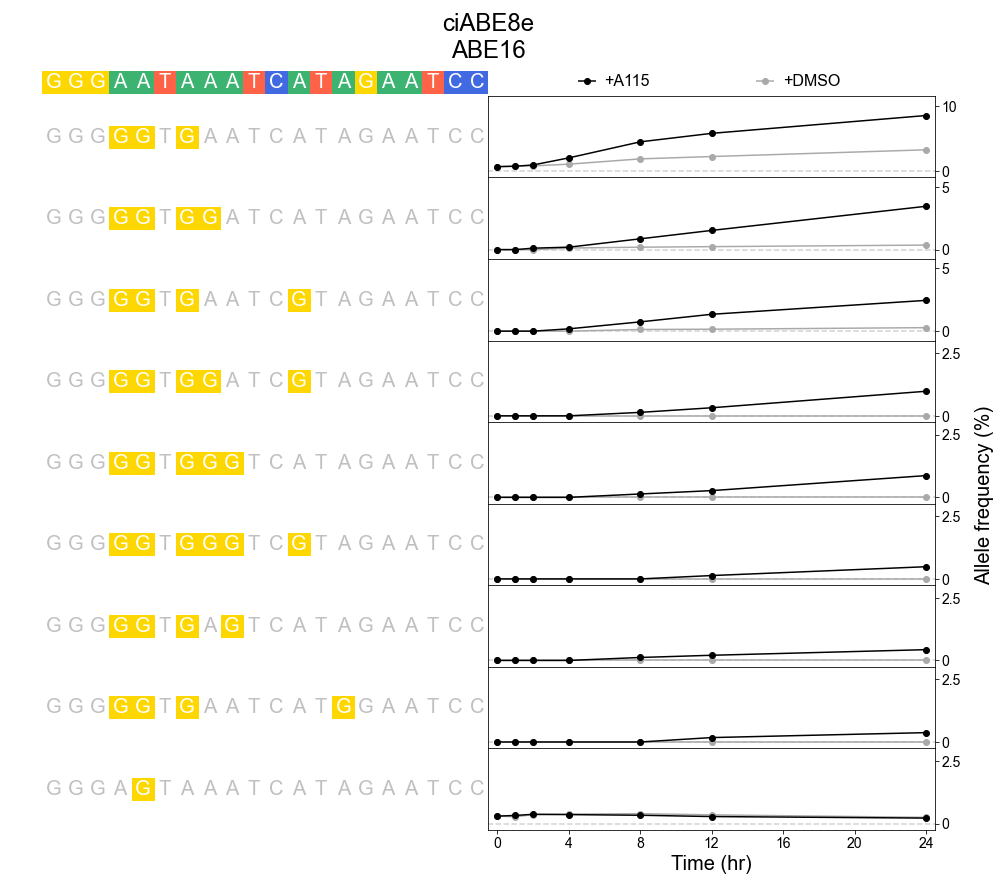

In [87]:
ref = 'GGGAATAAATCATAGAATCC'
plt.rc('font', size=20)

fig, ax = plt.subplots(len(df_A115_data),2,figsize=(16,len(df_A115_data)*1.5),gridspec_kw={'width_ratios': [1,1]})

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

timepoints = [0,1,2,4,8,12,24]

target_row = 0

for i, ax in enumerate(fig.axes):
    if i%2 == 0:
        ax.set_xlim([0,20])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        if df_A115.iloc[target_row]['target'] == ref:
            ax.set_ylim([0.45,0.75])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == 'A':
                    ax.scatter(x+0.5,0.5,s=450,c='mediumseagreen',marker='s')
                    ax.text(x+0.5,0.5, 'A', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'C':
                    ax.scatter(x+0.5,0.5,s=450,c='royalblue',marker='s')
                    ax.text(x+0.5,0.5, 'C', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'G':
                    ax.scatter(x+0.5,0.5,s=450,c='gold',marker='s')
                    ax.text(x+0.5,0.5, 'G', ha='center',va='center',color='white',size=20)
                elif nucleotide == 'T':
                    ax.scatter(x+0.5,0.5,s=450,c='tomato',marker='s')
                    ax.text(x+0.5,0.5, 'T', ha='center',va='center',color='white',size=20)
        else:
            ax.set_ylim([0.95,1.05])
            for x,nucleotide in enumerate(df_A115.iloc[target_row]['target']):
                if nucleotide == ref[x]:
                    ax.text(x+0.5,1, nucleotide, ha='center',va='center',color='silver',size=20)
                else:
                    if nucleotide == 'A':
                        ax.scatter(x+0.5,1,s=450,c='mediumseagreen',marker='s')
                        ax.text(x+0.5,1, 'A', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'C':
                        ax.scatter(x+0.5,1,s=450,c='royalblue',marker='s')
                        ax.text(x+0.5,1, 'C', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'G':
                        ax.scatter(x+0.5,1,s=450,c='gold',marker='s')
                        ax.text(x+0.5,1, 'G', ha='center',va='center',color='white',size=20)
                    elif nucleotide == 'T':
                        ax.scatter(x+0.5,1,s=450,c='tomato',marker='s')
                        ax.text(x+0.5,1, 'T', ha='center',va='center',color='white',size=20)
        target_row+=1
    else:
        if i != len(df_A115_data)*2-1:
            ax.get_xaxis().set_visible(False)
        if i == 1:
            ax.get_yaxis().set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.yaxis.tick_right()
        ax.set_xlim([-0.5,24.5])
        
fig.axes[3].errorbar(timepoints,df_DMSO_data.iloc[1],yerr=df_DMSO_SEM.iloc[1],fmt='-o',color='darkgrey')
fig.axes[3].errorbar(timepoints,df_A115_data.iloc[1],yerr=df_A115_SEM.iloc[1],fmt='-o',color='black')
fig.axes[3].set_ylim([-1,11.5])
fig.axes[3].set_yticks([0,10])
fig.axes[3].set_yticklabels([0,10],fontsize=14)
fig.axes[3].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[5].errorbar(timepoints,df_DMSO_data.iloc[2],yerr=df_DMSO_SEM.iloc[2],fmt='-o',color='darkgrey')
fig.axes[5].errorbar(timepoints,df_A115_data.iloc[2],yerr=df_A115_SEM.iloc[2],fmt='-o',color='black')
fig.axes[5].set_ylim([-0.75,5.75])
fig.axes[5].set_yticks([0,5])
fig.axes[5].set_yticklabels([0,5],fontsize=14)
fig.axes[5].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[7].errorbar(timepoints,df_DMSO_data.iloc[3],yerr=df_DMSO_SEM.iloc[3],fmt='-o',color='darkgrey')
fig.axes[7].errorbar(timepoints,df_A115_data.iloc[3],yerr=df_A115_SEM.iloc[3],fmt='-o',color='black')
fig.axes[7].set_ylim([-0.75,5.75])
fig.axes[7].set_yticks([0,5])
fig.axes[7].set_yticklabels([0,5],fontsize=14)
fig.axes[7].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[9].errorbar(timepoints,df_DMSO_data.iloc[4],yerr=df_DMSO_SEM.iloc[4],fmt='-o',color='darkgrey')
fig.axes[9].errorbar(timepoints,df_A115_data.iloc[4],yerr=df_A115_SEM.iloc[4],fmt='-o',color='black')
fig.axes[9].set_ylim([-0.25,3])
fig.axes[9].set_yticks([0,2.5])
fig.axes[9].set_yticklabels([0,2.5],fontsize=14)
fig.axes[9].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[11].errorbar(timepoints,df_DMSO_data.iloc[5],yerr=df_DMSO_SEM.iloc[5],fmt='-o',color='darkgrey')
fig.axes[11].errorbar(timepoints,df_A115_data.iloc[5],yerr=df_A115_SEM.iloc[5],fmt='-o',color='black')
fig.axes[11].set_ylim([-0.25,3])
fig.axes[11].set_yticks([0,2.5])
fig.axes[11].set_yticklabels([0,2.5],fontsize=14)
fig.axes[11].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[13].errorbar(timepoints,df_DMSO_data.iloc[6],yerr=df_DMSO_SEM.iloc[6],fmt='-o',color='darkgrey')
fig.axes[13].errorbar(timepoints,df_A115_data.iloc[6],yerr=df_A115_SEM.iloc[6],fmt='-o',color='black')
fig.axes[13].set_ylim([-0.25,3])
fig.axes[13].set_yticks([0,2.5])
fig.axes[13].set_yticklabels([0,2.5],fontsize=14)
fig.axes[13].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[15].errorbar(timepoints,df_DMSO_data.iloc[7],yerr=df_DMSO_SEM.iloc[7],fmt='-o',color='darkgrey')
fig.axes[15].errorbar(timepoints,df_A115_data.iloc[7],yerr=df_A115_SEM.iloc[7],fmt='-o',color='black')
fig.axes[15].set_ylim([-0.25,3])
fig.axes[15].set_yticks([0,2.5])
fig.axes[15].set_yticklabels([0,2.5],fontsize=14)
fig.axes[15].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[17].errorbar(timepoints,df_DMSO_data.iloc[8],yerr=df_DMSO_SEM.iloc[8],fmt='-o',color='darkgrey')
fig.axes[17].errorbar(timepoints,df_A115_data.iloc[8],yerr=df_A115_SEM.iloc[8],fmt='-o',color='black')
fig.axes[17].set_ylim([-0.25,3])
fig.axes[17].set_yticks([0,2.5])
fig.axes[17].set_yticklabels([0,2.5],fontsize=14)
fig.axes[17].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[19].errorbar(timepoints,df_DMSO_data.iloc[9],yerr=df_DMSO_SEM.iloc[9],fmt='-o',color='darkgrey')
fig.axes[19].errorbar(timepoints,df_A115_data.iloc[9],yerr=df_A115_SEM.iloc[9],fmt='-o',color='black')
fig.axes[19].set_ylim([-0.25,3])
fig.axes[19].set_yticks([0,2.5])
fig.axes[19].set_yticklabels([0,2.5],fontsize=14)
fig.axes[19].axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

fig.axes[19].set_xlabel('Time (hr)',fontsize=20)
fig.axes[19].set_xticklabels(timepoints,fontsize=14)
fig.axes[19].set_xticks([0,4,8,12,16,20,24])
fig.axes[19].set_xticklabels([0,4,8,12,16,20,24],fontsize=14)

fig.add_subplot(1,1,1, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.axes[20].yaxis.set_label_position('right')
fig.axes[20].set_ylabel('Allele frequency (%)',labelpad=40,position=(2,0.41),fontsize=20)

fig.axes[1].errorbar(5,0.5,xerr=0.5,fmt='o',color='black')
fig.axes[1].text(6,0.5,'+A115', ha='left',va='center',color='black',size=16)
fig.axes[1].errorbar(15,0.5,xerr=0.5,fmt='o',color='darkgrey')
fig.axes[1].text(16,0.5,'+DMSO', ha='left',va='center',color='black',size=16)
fig.axes[1].set_ylim([0,2.75])

plt.title('ciABE8e\nABE16',y=0.94)

plt.savefig('ExportedPlots/ABE8e_ABE16_allelefreq_timecourse_20211109.svg',dpi=300,bbox_inches='tight')

# 5D) Dependent alleles

BE4max, HEK3, GGCTTAGACTGAGCACGTGA

In [88]:
df_c = pd.read_csv('Data/cumulative/BE4max_HEK3_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/BE4max_HEK3_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [89]:
df_allele1 = df_c[['C4','C5']]
df_allele1['probability'] = df_allele1['C4'] * df_allele1['C5']
df_allele1.to_csv('Data/calc_freq/BE4max_HEK3_C4_C5.csv',index=False)

df_allele1_err = df_c_sem[['C4','C5']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['C4']/df_allele1['C4']) +
                                        np.square(df_allele1_err['C5']/df_allele1['C5'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/BE4max_HEK3_C4_C5_err.csv',index=False)

<ipython-input-89-7395ac359466>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['C4'] * df_allele1['C5']
<ipython-input-89-7395ac359466>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['C4']/df_allele1['C4']) +


In [90]:
df_a = pd.read_csv('Data/merged/20211109_BE4max_HEK3_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.925121,0.928171,0.924640,0.901618,0.843669,0.803371,0.666801
GGCTTAGACTGAGCACGTGA,0.002329,0.002447,0.004855,0.012111,0.044092,0.074417,0.163829
GGCCTAGACTGAGCACGTGA,0.004485,0.005300,0.007265,0.018472,0.032609,0.031679,0.045366
GGCTTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.002236,0.007816,0.022758
GGCCTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.003638,0.005335,0.009324


In [91]:
df_a_err = pd.read_csv('Data/merged/20211109_BE4max_HEK3_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.002759,0.000214,0.004645,0.001906,0.001182,0.002801,0.004508
GGCTTAGACTGAGCACGTGA,0.000409,0.000176,0.000164,0.000464,0.001043,0.002163,0.003012
GGCCTAGACTGAGCACGTGA,0.000254,0.000474,0.000373,0.000984,0.001393,0.000764,0.001096
GGCTTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.000430,0.000468,0.000386
GGCCTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.000550,0.000218,0.000169


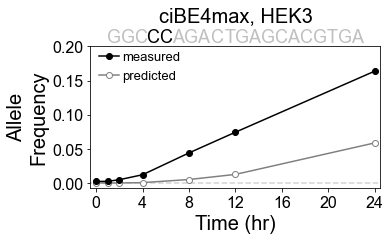

In [92]:
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGCTTAGACTGAGCACGTGA'],yerr=df_a_err.loc['GGCTTAGACTGAGCACGTGA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim([-0.007,0.2])
ax.set_yticks([0,0.05,0.1,0.15,0.2])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='predicted',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.1, 0.2, 'GG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(3.8, 0.2, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4.9, 0.2, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6, 0.2, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.2, 0.2, 'AGA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.4, 0.2, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(17.1, 0.2, 'TGAGCACGTGA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciBE4max, HEK3',fontsize=20,pad=25)

plt.savefig('ExportedPlots/BE4max_HEK3_allele1_20211206.svg',dpi=300,bbox_inches='tight')

ABEmax, ABE16, GGGAGTGAATCATAGAATCC

In [93]:
df_c = pd.read_csv('Data/cumulative/ABEmax_ABE16_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABEmax_ABE16_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [94]:
df_allele1 = df_c[['A5','A7']]
df_allele1['probability'] = df_allele1['A5'] * df_allele1['A7']
df_allele1.to_csv('Data/calc_freq/ABEmax_ABE16_A5_A7.csv',index=False)

df_allele1_err = df_c_sem[['A5','A7']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A5']/df_allele1['A5']) +
                                        np.square(df_allele1_err['A7']/df_allele1['A7'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/ABEmax_ABE16_A5_A7_err.csv',index=False)

<ipython-input-94-c242a87629cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['A5'] * df_allele1['A7']
<ipython-input-94-c242a87629cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A5']/df_allele1['A5']) +


In [95]:
df_a = pd.read_csv('Data/merged/20211109_ABEmax_ABE16_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGGAATAAATCATAGAATCC,0.919947,0.924404,0.902886,0.861335,0.806898,0.774293,0.710869
GGGAGTGAATCATAGAATCC,0.005525,0.004219,0.008893,0.013371,0.043470,0.077748,0.138791
GGGAGTAAATCATAGAATCC,0.015151,0.017759,0.033004,0.064163,0.081831,0.070146,0.041986
GGGGGTGAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.002714,0.008501,0.032248
GGGGGTAAATCATAGAATCC,0.000000,0.000000,0.000000,0.001083,0.002492,0.003630,0.005228


In [96]:
df_a_err = pd.read_csv('Data/merged/20211109_ABEmax_ABE16_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGGAATAAATCATAGAATCC,0.006600,0.000595,0.006292,0.000194,0.008426,0.008183,0.004522
GGGAGTGAATCATAGAATCC,0.001233,0.000640,0.001280,0.000532,0.002265,0.004010,0.003277
GGGAGTAAATCATAGAATCC,0.001102,0.000065,0.001725,0.000805,0.004362,0.002400,0.001099
GGGGGTGAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.000426,0.000312,0.000260
GGGGGTAAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.000385,0.000170,0.000054


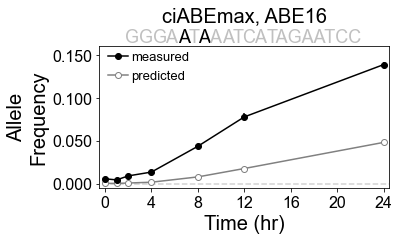

In [97]:
# allele 1: GGGAGTGAATCATAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGAGTGAATCATAGAATCC'],yerr=df_a_err.loc['GGGAGTGAATCATAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.005,0.16])
ax.set_yticks([0,0.05,0.1,0.15])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='predicted',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.16, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.16, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6.8, 0.16, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.16, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.16, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.16, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.6, 0.16, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.16, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.16, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18, 0.16, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABEmax, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABEmax_ABE16_allele1_20211206.svg',dpi=300,bbox_inches='tight')

ABE8e, ABE16, GGGGGTGAATCATAGAATCC

In [98]:
df_c = pd.read_csv('Data/cumulative/ABE8e_ABE16_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABE8e_ABE16_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [99]:
df_allele1 = df_c[['A4','A5','A7']]
df_allele1['probability'] = df_allele1['A4'] * df_allele1['A5'] * df_allele1['A7']
df_allele1.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7.csv',index=False)

df_allele1_err = df_c_sem[['A4','A5','A7']]
df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A4']/df_allele1['A4']) + 
                                        np.square(df_allele1_err['A5']/df_allele1['A5']) +
                                        np.square(df_allele1_err['A7']/df_allele1['A7'])) * df_allele1['probability']
df_allele1_err.to_csv('Data/calc_freq/ABE8e_ABE16_A4_A5_A7_err.csv',index=False)

<ipython-input-99-afbad7559382>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1['probability'] = df_allele1['A4'] * df_allele1['A5'] * df_allele1['A7']
<ipython-input-99-afbad7559382>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele1_err['probability'] = np.sqrt(np.square(df_allele1_err['A4']/df_allele1['A4']) +


In [100]:
df_a = pd.read_csv('Data/merged/20211109_ABE8e_ABE16_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGGAATAAATCATAGAATCC,0.933183,0.932138,0.922144,0.908913,0.867935,0.800649,0.748839
GGGGGTGAATCATAGAATCC,0.006594,0.007189,0.009207,0.020029,0.044630,0.057642,0.084975
GGGGGTGGATCATAGAATCC,0.000000,0.000000,0.001148,0.001937,0.008606,0.015302,0.034533
GGGGGTGAATCGTAGAATCC,0.000000,0.000000,0.000000,0.001839,0.007391,0.013438,0.024539
GGGGGTGGATCGTAGAATCC,0.000000,0.000000,0.000000,0.000000,0.001377,0.003212,0.009790


In [101]:
df_a_err = pd.read_csv('Data/merged/20211109_ABE8e_ABE16_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGGAATAAATCATAGAATCC,0.001143,0.001127,0.007063,0.001233,0.002568,0.027789,0.005444
GGGGGTGAATCATAGAATCC,0.000678,0.000411,0.001095,0.000308,0.001929,0.001155,0.002512
GGGGGTGGATCATAGAATCC,0.000000,0.000000,0.000000,0.000258,0.000666,0.000657,0.000274
GGGGGTGAATCGTAGAATCC,0.000000,0.000000,0.000000,0.000136,0.000526,0.000777,0.000750
GGGGGTGGATCGTAGAATCC,0.000000,0.000000,0.000000,0.000000,0.000069,0.000413,0.000271


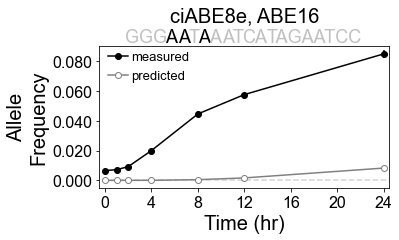

In [102]:
# allele 1: GGGGGTGAATCATAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele1['probability'],yerr=df_allele1_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTGAATCATAGAATCC'],yerr=df_a_err.loc['GGGGGTGAATCATAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.005,0.09])
ax.set_yticks([0,0.02,0.04,0.06,0.08])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='predicted',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.09, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.09, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.09, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.09, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.09, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(9.5, 0.09, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.6, 0.09, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.09, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.09, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18, 0.09, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_ABE16_allele1_20211206.svg',dpi=300,bbox_inches='tight')

# 5E) Independent alleles

BE4max, HEK3, GGCCTAGATTGAGCACGTGA

In [103]:
df_c = pd.read_csv('Data/cumulative/BE4max_HEK3_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/BE4max_HEK3_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [104]:
df_allele3 = df_c[['C5','C9']]
df_allele3['probability'] = df_allele3['C5'] * df_allele3['C9']
df_allele3.to_csv('Data/calc_freq/BE4max_HEK3_C5_C9.csv',index=False)

df_allele3_err = df_c_sem[['C5','C9']]
df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['C5']/df_allele3['C5']) +
                                        np.square(df_allele3_err['C9']/df_allele3['C9'])) * df_allele3['probability']
df_allele3_err.to_csv('Data/calc_freq/BE4max_HEK3_C5_C9_err.csv',index=False)

<ipython-input-104-b289afee2709>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3['probability'] = df_allele3['C5'] * df_allele3['C9']
<ipython-input-104-b289afee2709>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['C5']/df_allele3['C5']) +


In [105]:
df_a = pd.read_csv('Data/merged/20211109_BE4max_HEK3_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.925121,0.928171,0.924640,0.901618,0.843669,0.803371,0.666801
GGCTTAGACTGAGCACGTGA,0.002329,0.002447,0.004855,0.012111,0.044092,0.074417,0.163829
GGCCTAGACTGAGCACGTGA,0.004485,0.005300,0.007265,0.018472,0.032609,0.031679,0.045366
GGCTTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.002236,0.007816,0.022758
GGCCTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.003638,0.005335,0.009324


In [106]:
df_a_err = pd.read_csv('Data/merged/20211109_BE4max_HEK3_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.002759,0.000214,0.004645,0.001906,0.001182,0.002801,0.004508
GGCTTAGACTGAGCACGTGA,0.000409,0.000176,0.000164,0.000464,0.001043,0.002163,0.003012
GGCCTAGACTGAGCACGTGA,0.000254,0.000474,0.000373,0.000984,0.001393,0.000764,0.001096
GGCTTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.000430,0.000468,0.000386
GGCCTAGATTGAGCACGTGA,0.000000,0.000000,0.000000,0.000000,0.000550,0.000218,0.000169


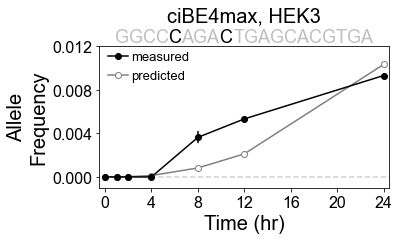

In [107]:
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele3['probability'],yerr=df_allele3_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGCCTAGATTGAGCACGTGA'],yerr=df_a_err.loc['GGCCTAGATTGAGCACGTGA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.012])
ax.set_yticks([0,0.004,0.008,0.012])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='predicted',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(2.1, 0.012, 'GG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(3.8, 0.012, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(4.9, 0.012, 'C', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(6, 0.012, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.2, 0.012, 'AGA', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.4, 0.012, 'C', ha='center', va='bottom',color='black',fontsize=18)
ax.text(17.1, 0.012, 'TGAGCACGTGA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciBE4max, HEK3',fontsize=20,pad=25)

plt.savefig('ExportedPlots/BE4max_HEK3_allele3_20211206.svg',dpi=300,bbox_inches='tight')

ABEmax, ABE16, GGGGGTAAATCATAGAATCC

In [108]:
df_c = pd.read_csv('Data/cumulative/ABEmax_ABE16_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABEmax_ABE16_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [109]:
df_allele3 = df_c[['A4','A5']]
df_allele3['probability'] = df_allele3['A4'] * df_allele3['A5']
df_allele3.to_csv('Data/calc_freq/ABEmax_ABE16_A4_A5.csv',index=False)

df_allele3_err = df_c_sem[['A4','A5']]
df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['A4']/df_allele3['A4']) +
                                        np.square(df_allele3_err['A5']/df_allele3['A5'])) * df_allele3['probability']
df_allele3_err.to_csv('Data/calc_freq/ABEmax_ABE16_A4_A5_err.csv',index=False)

<ipython-input-109-34a0edb217c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3['probability'] = df_allele3['A4'] * df_allele3['A5']
<ipython-input-109-34a0edb217c2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['A4']/df_allele3['A4']) +


In [110]:
df_a = pd.read_csv('Data/merged/20211109_ABEmax_ABE16_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGGAATAAATCATAGAATCC,0.919947,0.924404,0.902886,0.861335,0.806898,0.774293,0.710869
GGGAGTGAATCATAGAATCC,0.005525,0.004219,0.008893,0.013371,0.043470,0.077748,0.138791
GGGAGTAAATCATAGAATCC,0.015151,0.017759,0.033004,0.064163,0.081831,0.070146,0.041986
GGGGGTGAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.002714,0.008501,0.032248
GGGGGTAAATCATAGAATCC,0.000000,0.000000,0.000000,0.001083,0.002492,0.003630,0.005228


In [111]:
df_a_err = pd.read_csv('Data/merged/20211109_ABEmax_ABE16_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGGAATAAATCATAGAATCC,0.006600,0.000595,0.006292,0.000194,0.008426,0.008183,0.004522
GGGAGTGAATCATAGAATCC,0.001233,0.000640,0.001280,0.000532,0.002265,0.004010,0.003277
GGGAGTAAATCATAGAATCC,0.001102,0.000065,0.001725,0.000805,0.004362,0.002400,0.001099
GGGGGTGAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.000426,0.000312,0.000260
GGGGGTAAATCATAGAATCC,0.000000,0.000000,0.000000,0.000000,0.000385,0.000170,0.000054


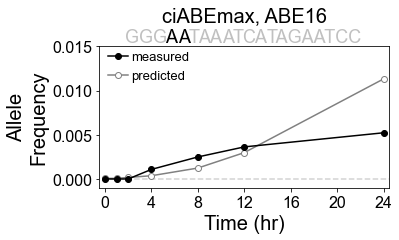

In [112]:
# allele 3: GGGGGTAAATCATAGAATCC
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele3['probability'],yerr=df_allele3_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGGGGTAAATCATAGAATCC'],yerr=df_a_err.loc['GGGGGTAAATCATAGAATCC'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.015])
ax.set_yticks([0,0.005,0.01,0.015])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='predicted',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.5, 0.015, 'GGG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(5.7, 0.015, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(6.8, 0.015, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(7.7, 0.015, 'T', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(8.5, 0.015, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(9.5, 0.015, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(10.6, 0.015, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(12, 0.015, 'TC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.4, 0.015, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(18, 0.015, 'TAGAATCC', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABEmax, ABE16',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABEmax_ABE16_allele3_20211206.svg',dpi=300,bbox_inches='tight')

ABE8e, HEK3, GGCCCGGACTGGGCACGTGA

In [113]:
df_c = pd.read_csv('Data/cumulative/ABE8e_HEK3_A115.csv')
df_c = df_c / 100

df_c_sem = pd.read_csv('Data/cumulative/ABE8e_HEK3_A115_sem.csv')
df_c_sem = df_c_sem / 100

In [114]:
df_allele3 = df_c[['A6','A12']]
df_allele3['probability'] = df_allele3['A6'] * df_allele3['A12']
df_allele3.to_csv('Data/calc_freq/ABE8e_HEK3_A6_A12.csv',index=False)

df_allele3_err = df_c_sem[['A6','A12']]
df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['A6']/df_allele3['A6']) +
                                        np.square(df_allele3_err['A12']/df_allele3['A12'])) * df_allele3['probability']
df_allele3_err.to_csv('Data/calc_freq/ABE8e_HEK3_A6_A12_err.csv',index=False)

<ipython-input-114-ec5bb5bda89f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3['probability'] = df_allele3['A6'] * df_allele3['A12']
<ipython-input-114-ec5bb5bda89f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allele3_err['probability'] = np.sqrt(np.square(df_allele3_err['A6']/df_allele3['A6']) +


In [115]:
df_a = pd.read_csv('Data/merged/20211109_ABE8e_HEK3_A115.csv',
                   usecols=['target','24h_mean','12h_mean','8h_mean','4h_mean',
                            '2h_mean','1h_mean','0h_mean'])

df_a = df_a.set_index('target')
df_a = df_a.fillna(0)
df_a = df_a[df_a.columns[::-1]]
df_a = df_a / 100

df_a.head()

,0h_mean,1h_mean,2h_mean,4h_mean,8h_mean,12h_mean,24h_mean
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.838860,0.818099,0.804165,0.791763,0.766234,0.756861,0.699527
GGCCCGGGCTGAGCACGTGA,0.025601,0.031821,0.032058,0.043629,0.075972,0.086982,0.149267
GGCCCGGACTGAGCACGTGA,0.063645,0.073208,0.079565,0.088142,0.073561,0.061793,0.037680
GGCCCGGGCTGGGCACGTGA,0.000000,0.000000,0.001243,0.001524,0.005511,0.007229,0.020526
GGCCCGGACTGGGCACGTGA,0.000000,0.001380,0.001779,0.002131,0.003840,0.003201,0.004859


In [116]:
df_a_err = pd.read_csv('Data/merged/20211109_ABE8e_HEK3_A115.csv',
                       usecols=['target','24h_SEM','12h_SEM','8h_SEM','4h_SEM',
                                '2h_SEM','1h_SEM','0h_SEM'])

df_a_err = df_a_err.set_index('target')
df_a_err = df_a_err.fillna(0)
df_a_err = df_a_err[df_a_err.columns[::-1]]
df_a_err = df_a_err / 100

df_a_err.head()

,0h_SEM,1h_SEM,2h_SEM,4h_SEM,8h_SEM,12h_SEM,24h_SEM
target,,,,,,,
GGCCCAGACTGAGCACGTGA,0.004222,0.005453,0.013235,0.004037,0.005033,0.009833,0.004658
GGCCCGGGCTGAGCACGTGA,0.001077,0.002781,0.002558,0.001754,0.001800,0.009967,0.005614
GGCCCGGACTGAGCACGTGA,0.002378,0.000952,0.005087,0.001205,0.002150,0.001241,0.000650
GGCCCGGGCTGGGCACGTGA,0.000000,0.000000,0.000108,0.000107,0.000164,0.002030,0.000130
GGCCCGGACTGGGCACGTGA,0.000000,0.000147,0.000323,0.000624,0.000869,0.000398,0.000232


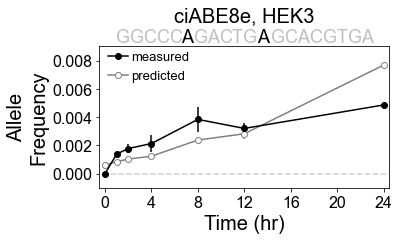

In [117]:
# allele 3: GGCCCGGACTGGGCACGTGA
fig,ax = plt.subplots(figsize=(5.2,2.6))

time = [0,1,2,4,8,12,24]

ax.axhline(0,-0.5,24.5,color='lightgrey',linestyle='--')

ax.errorbar(time,df_allele3['probability'],yerr=df_allele3_err['probability'],
            fmt='-o',mfc='white',color='grey',label='calculated')
ax.errorbar(time,df_a.loc['GGCCCGGACTGGGCACGTGA'],yerr=df_a_err.loc['GGCCCGGACTGGGCACGTGA'],
            marker='o',color='black',label='measured')

ax.set_xlim([-0.5,24.5])
ax.set_xticks([0,4,8,12,16,20,24])
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel('Time (hr)', fontsize=20)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([-0.001,0.009])
ax.set_yticks([0,0.002,0.004,0.006,0.008])
ax.tick_params(axis="y", labelsize=16)
ax.set_ylabel('Allele\nFrequency',fontsize=20)

legend_elements = [Line2D([0],[0],marker='o',color='black',label='measured',
                          markerfacecolor='black',markersize=6,linestyle='-'),
                   Line2D([0],[0],marker='o',color='grey',label='predicted',
                          markerfacecolor='white',markersize=6,linestyle='-')]
ax.legend(handles=legend_elements,bbox_to_anchor=(0.35,1.05),
          fontsize=13,frameon=False,handlelength=1.6,handletextpad=0.2)

ax.text(3.8, 0.009, 'GGCCC', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(7.1, 0.009, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(8.3, 0.009, 'G', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(9.35, 0.009, 'A', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(11.5, 0.009, 'CTG', ha='center', va='bottom',color='silver',fontsize=18)
ax.text(13.65, 0.009, 'A', ha='center', va='bottom',color='black',fontsize=18)
ax.text(18.7, 0.009, 'GCACGTGA', ha='center', va='bottom',color='silver',fontsize=18)

ax.set_title('ciABE8e, HEK3',fontsize=20,pad=25)

plt.savefig('ExportedPlots/ABE8e_HEK3_allele3_20211206.svg',dpi=300,bbox_inches='tight')